<a href="https://colab.research.google.com/github/ImNotDanish05/2025_Visi-Komputer_TI-2A/blob/main/Jobsheet02_KLASIFIKASI-GAMBAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By: ImNotDanish05

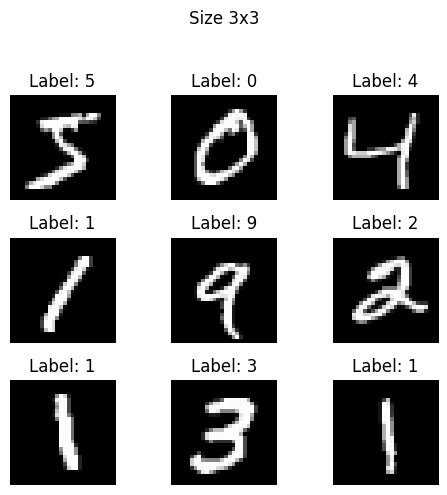

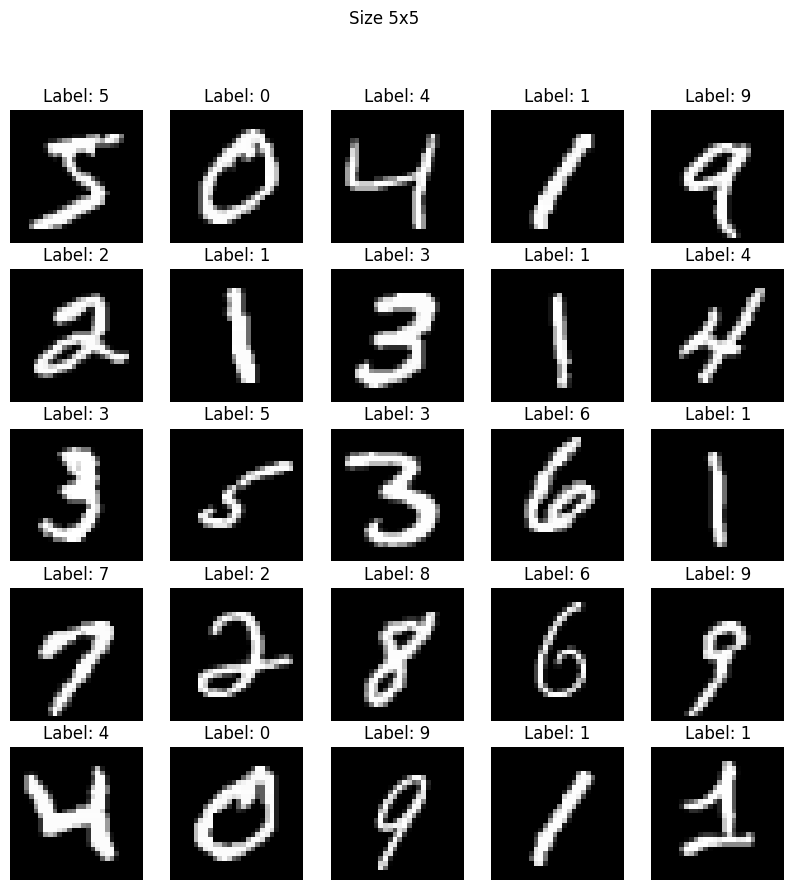

In [12]:
# @title Praktikum D1 – Memulai Klasifikasi Gambar dengan Dataset Sederhana
"""
Tugas kecil: Cobalah ganti range(9) dengan range(25) untuk menampilkan lebih banyak
contoh. Apa yang Anda perhatikan dari bentuk tulisan tangan manusia?
"""

# Load package
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(5,5))
plt.suptitle("Size 3x3")
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


plt.figure(figsize=(10,10))
plt.suptitle("Size 5x5")
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [8]:
# @title Praktikum D2 – Klasifikasi Gambar dengan Model Machine Learning Tradisional
"""
Tugas kecil: Ubah kernel dari linear menjadi rbf. Bagaimana pengaruhnya terhadap
akurasi?
"""
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten data dari 2D jadi 1D Vektor
x_train_flatten = x_train.reshape(len(x_train), -1) / 255.0
x_test_flatten = x_test.reshape(len(x_test), -1) / 255.0

# Training Model
clflinear = svm.SVC(kernel='linear', gamma='scale') # Linear
clfrbf = svm.SVC(kernel='rbf', gamma='scale') # RBF

# Gunakan subset karena SVM berat :)
# Batasi masing2 hanya 5000
clflinear.fit(x_train_flatten[:5000], y_train[:5000])
clfrbf.fit(x_train_flatten[:5000], y_train[:5000])

y_predlinear = clflinear.predict(x_test_flatten)
y_predrbf = clfrbf.predict(x_test_flatten)

print("Akurasi Linear: ", accuracy_score(y_test, y_predlinear))
print("Akurasi RBF: ", accuracy_score(y_test, y_predrbf))

Akurasi Linear:  0.9101
Akurasi RBF:  0.9513


In [14]:
# @title Praktikum D3 – Membangun CNN Sederhana
"""
Tugas kecil: Tambahkan satu lapisan Conv2D lagi sebelum Flatten. Apakah akurasinya meningkat?
"""
import tensorflow as tf
from tensorflow.keras import layers, models

x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])



model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)


modeltugas = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
modeltugas.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

historytugas = modeltugas.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8926 - loss: 0.3673 - val_accuracy: 0.9813 - val_loss: 0.0669
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - accuracy: 0.9790 - loss: 0.0679 - val_accuracy: 0.9847 - val_loss: 0.0579
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step - accuracy: 0.9864 - loss: 0.0456 - val_accuracy: 0.9875 - val_loss: 0.0504
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - accuracy: 0.9909 - loss: 0.0297 - val_accuracy: 0.9865 - val_loss: 0.0505
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9939 - loss: 0.0196 - val_accuracy: 0.9818 - val_loss: 0.0660
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.8912 - loss: 0.3476 - val_accuracy: 0.9820 - val_loss: 0.0569
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 45s 27ms/step - accuracy: 0.9839 - loss: 0.0516 - val_accuracy: 0.9883 - val_loss: 0.0406
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 44s 26ms/step - accuracy: 0.9889 - loss: 0

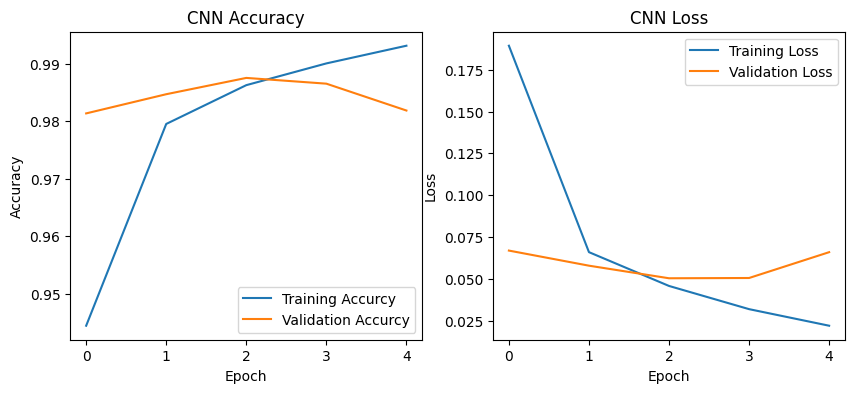

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9766 - loss: 0.0761


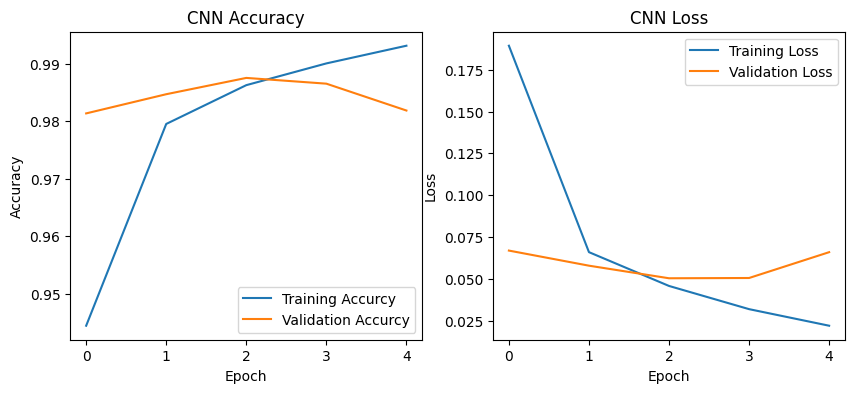

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9841 - loss: 0.0448


[0.03424535319209099, 0.9887999892234802]

In [15]:
# ===== Plot History =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accurcy')
plt.plot(history.history['val_accuracy'], label='Validation Accurcy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
model.evaluate(x_test_cnn, y_test)

# ===== Plot History Tugas =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accurcy')
plt.plot(history.history['val_accuracy'], label='Validation Accurcy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
modeltugas.evaluate(x_test_cnn, y_test)

In [ ]:
# @title Praktikum D4 – Eksperimen dengan Dataset Lebih Kompleks (CIFAR-10)
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

plt.figure(figsize=(5,5))
plt.suptitle("Size 3x3")
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss
              )